In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('cscpopendata.csv')

In [82]:
#data.info()

In [83]:
#data.isna().sum()

In [5]:
data.nunique()


#CDPHId is the product id. The unique count is the number of products that has been input in the category
#BUT NOTE THAT a product may appear more than once in the data set if a product has more than one Color/Scent/Flavor, 
#more than one Category, or more than one Chemical Name/CAS number reported.

#CPHId & productname unique counts are different - find out why

#CSF&CSFId, from looking at the data set csfid and csf unique counts are different because csf sometimes are general names
#for example 0, black, etc, which and be the same for other brands but shouldnt be a problem for now

#Company Id and Company Name counts are different - find out why, need to choose which one to go by
#There are 592 unique company names - if choose to use company name, should standardize first

CDPHId                    34908
ProductName               31838
CSFId                     54403
CSF                       32172
CompanyId                   621
CompanyName                 592
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       132
CasNumber                   123
ChemicalId                53564
ChemicalName                122
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
ChemicalCount                 9
dtype: int64

In [85]:
#data.head(60)

In [84]:
#data.tail()

In [86]:
#data.dtypes

In [9]:
data['InitialDateReported'] = data['InitialDateReported'].astype('datetime64')
data['MostRecentDateReported'] = data['MostRecentDateReported'].astype('datetime64')
data['DiscontinuedDate'] = data['DiscontinuedDate'].astype('datetime64')
data['ChemicalCreatedAt'] = data['ChemicalCreatedAt'].astype('datetime64')
data['ChemicalUpdatedAt'] = data['ChemicalUpdatedAt'].astype('datetime64')
data['ChemicalDateRemoved'] = data['ChemicalDateRemoved'].astype('datetime64')
data['CDPHId'] = data['CDPHId'].astype('str')
data['PrimaryCategoryId'] = data['PrimaryCategoryId'].astype('str')
data['CompanyId'] = data['CompanyId'].astype('str')

THINGS to do 

1. standardize column CompanyName X DONE/ ProductName / CSF/ ChemicalName data and create a new column for it !? 
    - convert company's name to all lower case
    - replace punctuations like , and . with ''
    - replace ' '  with ''
    - replace '""' and "''"

2. drop unneccessary columns X DONE
    - csfid
    - casnumber
    - casid
    - chemical id
    - company id
    - subcategory id

3. Change data type from Object to Date x DONE
    - InitialDate
    - MostRecentdate
    - chemical discountinue 
    - chemical created at
    - chemical updated at
    - chemical date removed

4. create a Product column that combine ProductName + CSF so we can now differentiate different color/scent as different products -*Should i do this tho? should I consider them as different products? X DONT DO IT
Questions
- do i treat same product, different csf as different products from the company? - I think i should
- but for the same product that has identical info except the chemical - i should combine it. How tho? covert chemical name column to list?

5. after that for products with same cdphid, make new column as chemical list and combine all chemicals
**let's not do this, just group by the product before graphing/ analyzing it 

6. create cleaned dataframe
create 2 dfs
one for the cleaned data 
and the other one, groupby either CDHPId or Product Name
IDEAL DF X DONE
    - CDPH ID
    - csf
    - Product name
    - Company Name
    - Brand name
    - primary category id - might need
    - Primary Category
    - Sub category
    - Chemical Name
    - Initial Date Reported
    - Most Recent Date Reported
    - chemical discontinued - can be used to find out the proportion of discontinue/ continue
    - chemicalcreated at
    - chemical updated at
    - chemical date removed - see company that's most remove the chemical
    - chemical count 

Things I want to find out
- Category with most frequent report chemicals x done
- subcat with most report chemicals
- most used chemical
- Company with most reported chemical products
- company, category with most chemical count
- mean chemical count 

In [10]:
data.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      70119
Nail Products                        14989
Skin Care Products                    7286
Sun-Related Products                  4731
Bath Products                         3271
Hair Coloring Products                1978
Hair Care Products (non-coloring)     1570
Tattoos and Permanent Makeup          1477
Personal Care Products                 751
Fragrances                             643
Oral Hygiene Products                  433
Shaving Products                       221
Baby Products                           43
Name: PrimaryCategory, dtype: int64

In [11]:
com = data[['CompanyId','CompanyName']].drop_duplicates()
com.sort_values(['CompanyName']).head(60)
#from this table, it shows exact same name has different ids for example Added Extras LLC has 716, 157, 118.
#let's use company name and drop company's id and we will standardize the companyname column 

,CompanyId,CompanyName
88196,1222,2355644 Ontario Inc.
45346,754,"A. P. Deauville, LLC"
86115,1206,ACQUA DI PARMA
12334,209,AFFLINK
32946,478,AG PROFESSIONAL HAIR CARE PRODUCTS LTD
88221,1228,"ALBION COSMETICS (America), Inc."
72770,1073,ALPHAEON Corporation
1398,82,AMCO International
72938,1076,AMOREPACIFIC US INC.
25198,350,ANC SPA INC


In [12]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='716'] #18 rows brand name include wal-mart, glee, hot topic

In [13]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='157'] #193 rows - Hot Topic,etc

In [14]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='118']['BrandName'].unique() #87rows

In [20]:
cdata = data[['CDPHId','ProductName','CSF','CompanyName', 'BrandName','PrimaryCategoryId','PrimaryCategory', 'SubCategory','ChemicalName','ChemicalCount','InitialDateReported','MostRecentDateReported','DiscontinuedDate', 'ChemicalCreatedAt','ChemicalUpdatedAt','ChemicalDateRemoved']]

In [21]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107512 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    107512 non-null object
ProductName               107512 non-null object
CSF                       74830 non-null object
CompanyName               107512 non-null object
BrandName                 107301 non-null object
PrimaryCategoryId         107512 non-null object
PrimaryCategory           107512 non-null object
SubCategory               107512 non-null object
ChemicalName              107512 non-null object
ChemicalCount             107512 non-null int64
InitialDateReported       107512 non-null datetime64[ns]
MostRecentDateReported    107512 non-null datetime64[ns]
DiscontinuedDate          12545 non-null datetime64[ns]
ChemicalCreatedAt         107512 non-null datetime64[ns]
ChemicalUpdatedAt         107512 non-null datetime64[ns]
ChemicalDateRemoved       2905 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [22]:
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 592
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [23]:
cdata.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
ChemicalCount                      int64
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
dtype: object

In [24]:
cdata.head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
1,3,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
2,3,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT


In [26]:
#DROP DUPLICATE ROWS
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null object
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [27]:
#standardize company name column
cdata.loc[:,'CompanyName'] = cdata.loc[:,'CompanyName'].str.lower()
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 590
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [28]:
cdata.CompanyName = cdata.CompanyName.str.replace(r'[\,\.,\" "]', '')
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [38]:
cdata.head(40)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
5,6,jillian dempsey for avon celestial eyeshadow-a...,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT
6,7,absolute precision color powder system - all s...,5858-81-1,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
7,7,absolute precision color powder system - all s...,D&C RED 7 CALCIUM LAKE,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
8,7,absolute precision color powder system - all s...,D&C RED 28,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
9,8,absolute precision color powder system opaque ...,D&C RED 7 CALCIUM LAKE,opiproductsinc,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT


In [30]:
#standardize product name column
cdata.loc[:,'ProductName'] = cdata.loc[:,'ProductName'].str.lower()
cdata.nunique()

#Why is there more CDPHId than Product Name when CDPHId is the product id - is it possible the same case as companyid and name
#it is possible that the product names can be coincidentally the same when they're from different brands/companies
#let's stick with CDPHId

CDPHId                    34908
ProductName               31591
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [31]:
#testing it out
com = cdata[['CDPHId','ProductName']].drop_duplicates()
com.sort_values(['ProductName']).head(60)

,CDPHId,ProductName
101540,38228,""" rouge dior ultra care liquid flower oil liqu..."
101448,38185,"""dior prestige le micro-fluide teint de rose m..."
28236,8607,"""hello flawless!"" spf 15"
51660,18659,"""i'm glam...therefore i am"" - glamming powder i"
33119,11314,"""my dream lather"" soap 'bar"
33121,11315,"""my lips love me"" lip balm"
71283,26542,"""un"" cover up"
35463,12262,#7 anti-aging mask
65964,24553,#lostmyslipper
85015,32603,#partygirlproblems


In [32]:
#DROP DUPLICATE ROWS AGAIN
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null object
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [39]:
cdata.nunique()

CDPHId                    34908
ProductName               31591
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [46]:
#create a groupby df 
cgroup = cdata.groupby(['CDPHId'])
cgroup = cgroup.first().reset_index()
cgroup.sort_values()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,10,absolute precision color powder system translu...,D&C RED 28,opiproductsinc,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT
1,100,colorstay 12 hour eye shadow quad- silver 12,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-08-27,2009-08-27,NaT,2009-08-27,2009-08-27,NaT
2,1000,all-over face color,Ginger Spice,bareescentualsbeautyinc,bareMinerals,44,Makeup Products (non-permanent),Face Powders,Titanium dioxide,1,2009-09-16,2016-03-29,NaT,2009-09-16,2009-09-16,NaT
3,1002,olay total effects cc cream tone correcting mo...,NaN,theprocter&gamblecompany,Olay,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),Titanium dioxide,1,2009-09-16,2015-08-27,2015-05-08,2009-09-16,2015-08-27,NaT
4,1003,olay total effects eye cream + concealer,NaN,theprocter&gamblecompany,Olay,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),Titanium dioxide,1,2009-09-16,2017-05-10,2011-11-01,2009-09-16,2009-09-16,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34903,9983,le prisme visage - blooming - unique compact p...,1 - BLOOMING PINKS,lvmhfragrancebrands,GIVENCHY,44,Makeup Products (non-permanent),Face Powders,Titanium dioxide,1,2010-01-30,2010-12-30,NaT,2010-01-30,2010-01-30,NaT
34904,9984,le prisme blush - blooming - unique blush - ra...,NaN,lvmhfragrancebrands,GIVENCHY,44,Makeup Products (non-permanent),Blushes,Titanium dioxide,1,2010-01-30,2010-01-30,NaT,2010-01-30,2010-01-30,NaT
34905,9985,08 concealer,NaN,buth-na-bodhaigeinc,The Body Shop,44,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,1,2010-02-01,2014-02-19,2013-07-10,2010-02-01,2010-02-01,NaT
34906,9987,93 eye shimmer,NaN,buth-na-bodhaigeinc,The Body Shop,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2010-02-01,2013-07-10,2013-07-10,2010-02-01,2010-02-01,NaT


In [52]:
cgroup[cgroup['CDPHId']=='2']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
8649,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT


In [66]:
cgroup.info()
#for Cgroup, can't use chemical name
##any chem realted column except chemcount since it's only showing first chemname in group

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34908 entries, 0 to 34907
Data columns (total 16 columns):
CDPHId                    34908 non-null object
ProductName               34908 non-null object
CSF                       8784 non-null object
CompanyName               34908 non-null object
BrandName                 34838 non-null object
PrimaryCategoryId         34908 non-null object
PrimaryCategory           34908 non-null object
SubCategory               34908 non-null object
ChemicalName              34908 non-null object
ChemicalCount             34908 non-null int64
InitialDateReported       34908 non-null datetime64[ns]
MostRecentDateReported    34908 non-null datetime64[ns]
DiscontinuedDate          4374 non-null datetime64[ns]
ChemicalCreatedAt         34908 non-null datetime64[ns]
ChemicalUpdatedAt         34908 non-null datetime64[ns]
ChemicalDateRemoved       1234 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 4.3+ MB


**4374 of the products reported were discontinued
4374/34908 ~ 12.5%**

In [53]:
cgroup.isnull().sum()

CDPHId                        0
ProductName                   0
CSF                       26124
CompanyName                   0
BrandName                    70
PrimaryCategoryId             0
PrimaryCategory               0
SubCategory                   0
ChemicalName                  0
ChemicalCount                 0
InitialDateReported           0
MostRecentDateReported        0
DiscontinuedDate          30534
ChemicalCreatedAt             0
ChemicalUpdatedAt             0
ChemicalDateRemoved       33674
dtype: int64

In [54]:
cgroup.nunique()

CDPHId                    34908
ProductName               31591
CSF                        5704
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                105
ChemicalCount                 9
InitialDateReported        2119
MostRecentDateReported     2018
DiscontinuedDate            964
ChemicalCreatedAt          2124
ChemicalUpdatedAt          2133
ChemicalDateRemoved         496
dtype: int64

**Primary Category**

In [55]:
cgroup.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      16796
Nail Products                         6702
Skin Care Products                    4778
Bath Products                         2185
Hair Care Products (non-coloring)     1201
Sun-Related Products                   836
Hair Coloring Products                 794
Fragrances                             427
Personal Care Products                 402
Oral Hygiene Products                  310
Tattoos and Permanent Makeup           263
Shaving Products                       175
Baby Products                           39
Name: PrimaryCategory, dtype: int64

In [58]:
cat_count = cgroup.PrimaryCategory.value_counts()
cat_count

Makeup Products (non-permanent)      16796
Nail Products                         6702
Skin Care Products                    4778
Bath Products                         2185
Hair Care Products (non-coloring)     1201
Sun-Related Products                   836
Hair Coloring Products                 794
Fragrances                             427
Personal Care Products                 402
Oral Hygiene Products                  310
Tattoos and Permanent Makeup           263
Shaving Products                       175
Baby Products                           39
Name: PrimaryCategory, dtype: int64

In [63]:
cc = cat_count.to_frame().reset_index()
cc = cc.rename(columns = {'PrimaryCategory':'Percent'})
cc

,index,Percent
0,Makeup Products (non-permanent),16796
1,Nail Products,6702
2,Skin Care Products,4778
3,Bath Products,2185
4,Hair Care Products (non-coloring),1201
5,Sun-Related Products,836
6,Hair Coloring Products,794
7,Fragrances,427
8,Personal Care Products,402
9,Oral Hygiene Products,310


Text(0.5, 1.0, 'Primary Category Reported Count')

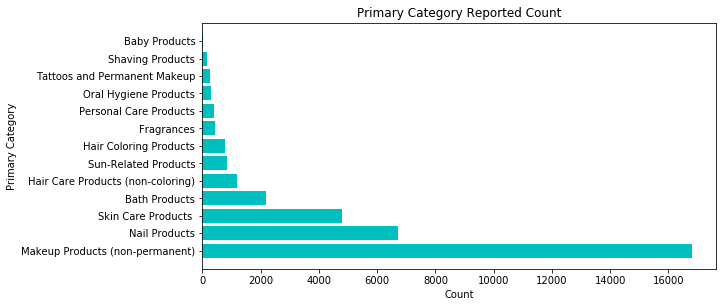

In [80]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cc['index'], cc['Percent'], color='c')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Count')
plt.title('Primary Category Reported Count')

# fig, ax = plt.subplots(figsize = (10,5))
# cgroup['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
# ax.set_xlabel('Count')
# ax.set_ylabel('Primary Category')

In [56]:
cat_percent = cgroup.PrimaryCategory.value_counts()*100/34908
cat_percent 

Makeup Products (non-permanent)      48.115045
Nail Products                        19.199037
Skin Care Products                   13.687407
Bath Products                         6.259310
Hair Care Products (non-coloring)     3.440472
Sun-Related Products                  2.394867
Hair Coloring Products                2.274550
Fragrances                            1.223215
Personal Care Products                1.151598
Oral Hygiene Products                 0.888049
Tattoos and Permanent Makeup          0.753409
Shaving Products                      0.501318
Baby Products                         0.111722
Name: PrimaryCategory, dtype: float64

In [64]:
cp = cat_percent.to_frame().reset_index()
cp = cp.rename(columns = {'PrimaryCategory':'Percent'})
##IMPORTANT INFO

Text(0.5, 1.0, 'Primary Category Reported Percentage')

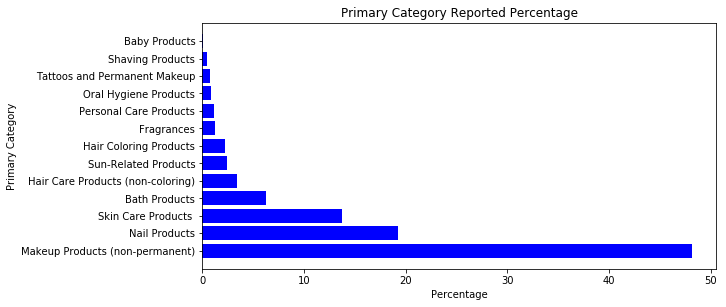

In [61]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cp['index'], cp['Percent'], color='b')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Percentage')
plt.title('Primary Category Reported Percentage')


# Makeup Products (non-permanent)	48.115045
# Nail Products	19.199037
# Skin Care Products	13.687407

**Chemical Counts**

Text(0, 0.5, 'Frequency')

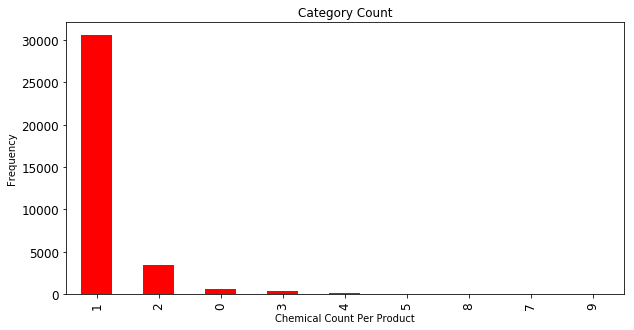

In [90]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['ChemicalCount'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Category Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

**Chemical Name**

In [67]:
cdata[cdata['PrimaryCategoryId']=='44'].groupby(['ChemicalName']).count().sort_values(['CDPHId'], ascending=False)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
ChemicalName,,,,,,,,,,,,,,,
Titanium dioxide,55617,55617,45450,55617,55510,55617,55617,55617,55617,55617,55617,6691,55617,55617,1152
Mica,1529,1529,1129,1529,1528,1529,1529,1529,1529,1529,1529,331,1529,1529,19
"Silica, crystalline (airborne particles of respirable size)",1297,1297,1108,1297,1297,1297,1297,1297,1297,1297,1297,30,1297,1297,107
Talc,1288,1288,1194,1288,1287,1288,1288,1288,1288,1288,1288,7,1288,1288,17
Butylated hydroxyanisole,949,949,861,949,949,949,949,949,949,949,949,70,949,949,4
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",834,834,757,834,834,834,834,834,834,834,834,213,834,834,56
Retinyl palmitate,673,673,513,673,673,673,673,673,673,673,673,13,673,673,19
Carbon black,545,545,448,545,545,545,545,545,545,545,545,26,545,545,3
"Mineral oils, untreated and mildly treated",332,332,154,332,332,332,332,332,332,332,332,144,332,332,0


In [91]:
c = cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts()*100/100633
c = c.to_frame().reset_index()
c = c.rename(columns={'ChemicalName':'Percentage'})
#c
#chemical percentage in MAKE UP NONPERMANENT category

In [88]:
cdata['ChemicalName'].value_counts()*100/107512
#chemical used overall

Titanium dioxide                                                                                       76.429608
Silica, crystalline (airborne particles of respirable size)                                             2.123484
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     1.882581
Mica                                                                                                    1.561686
Carbon black                                                                                            1.505878
                                                                                                         ...    
Extract of coffee bean                                                                                  0.000930
Diethanolamides of the fatty acids of coconut oil                                                       0.000930
Retinol palmitate                                                                               

Text(0, 0.5, 'Frequency')

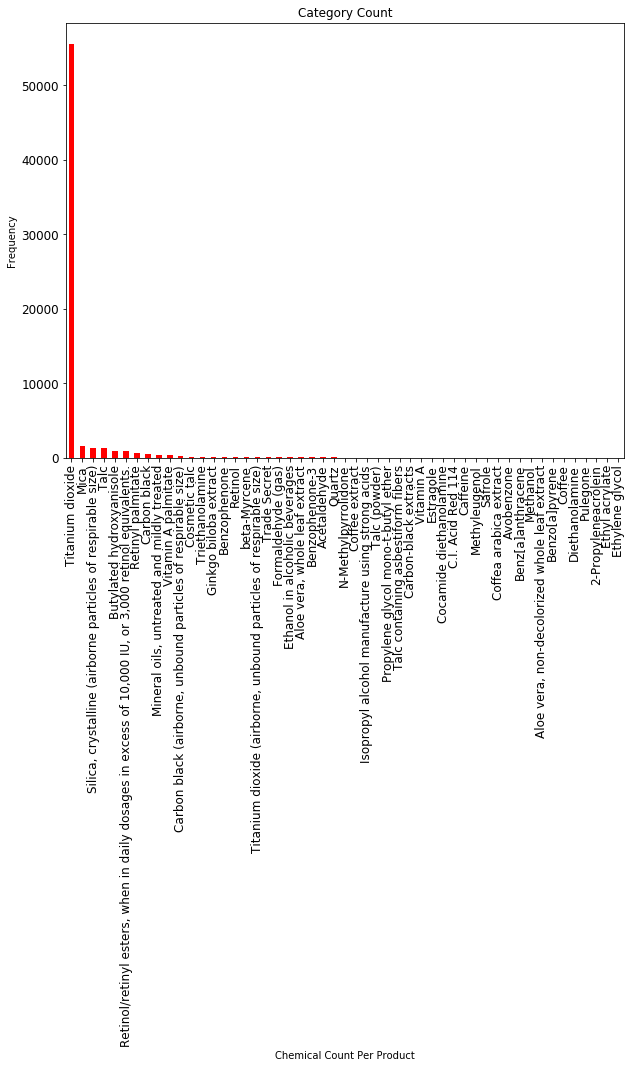

In [70]:
fig, ax = plt.subplots(figsize = (10,8))
cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Category Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

**plot bar graph of each category and stack the chemicals used in each bar**

In [72]:
pivot_df = cdata.pivot_table(index='PrimaryCategory', columns='ChemicalName', values='CDPHId', aggfunc='count')
#pivot_df

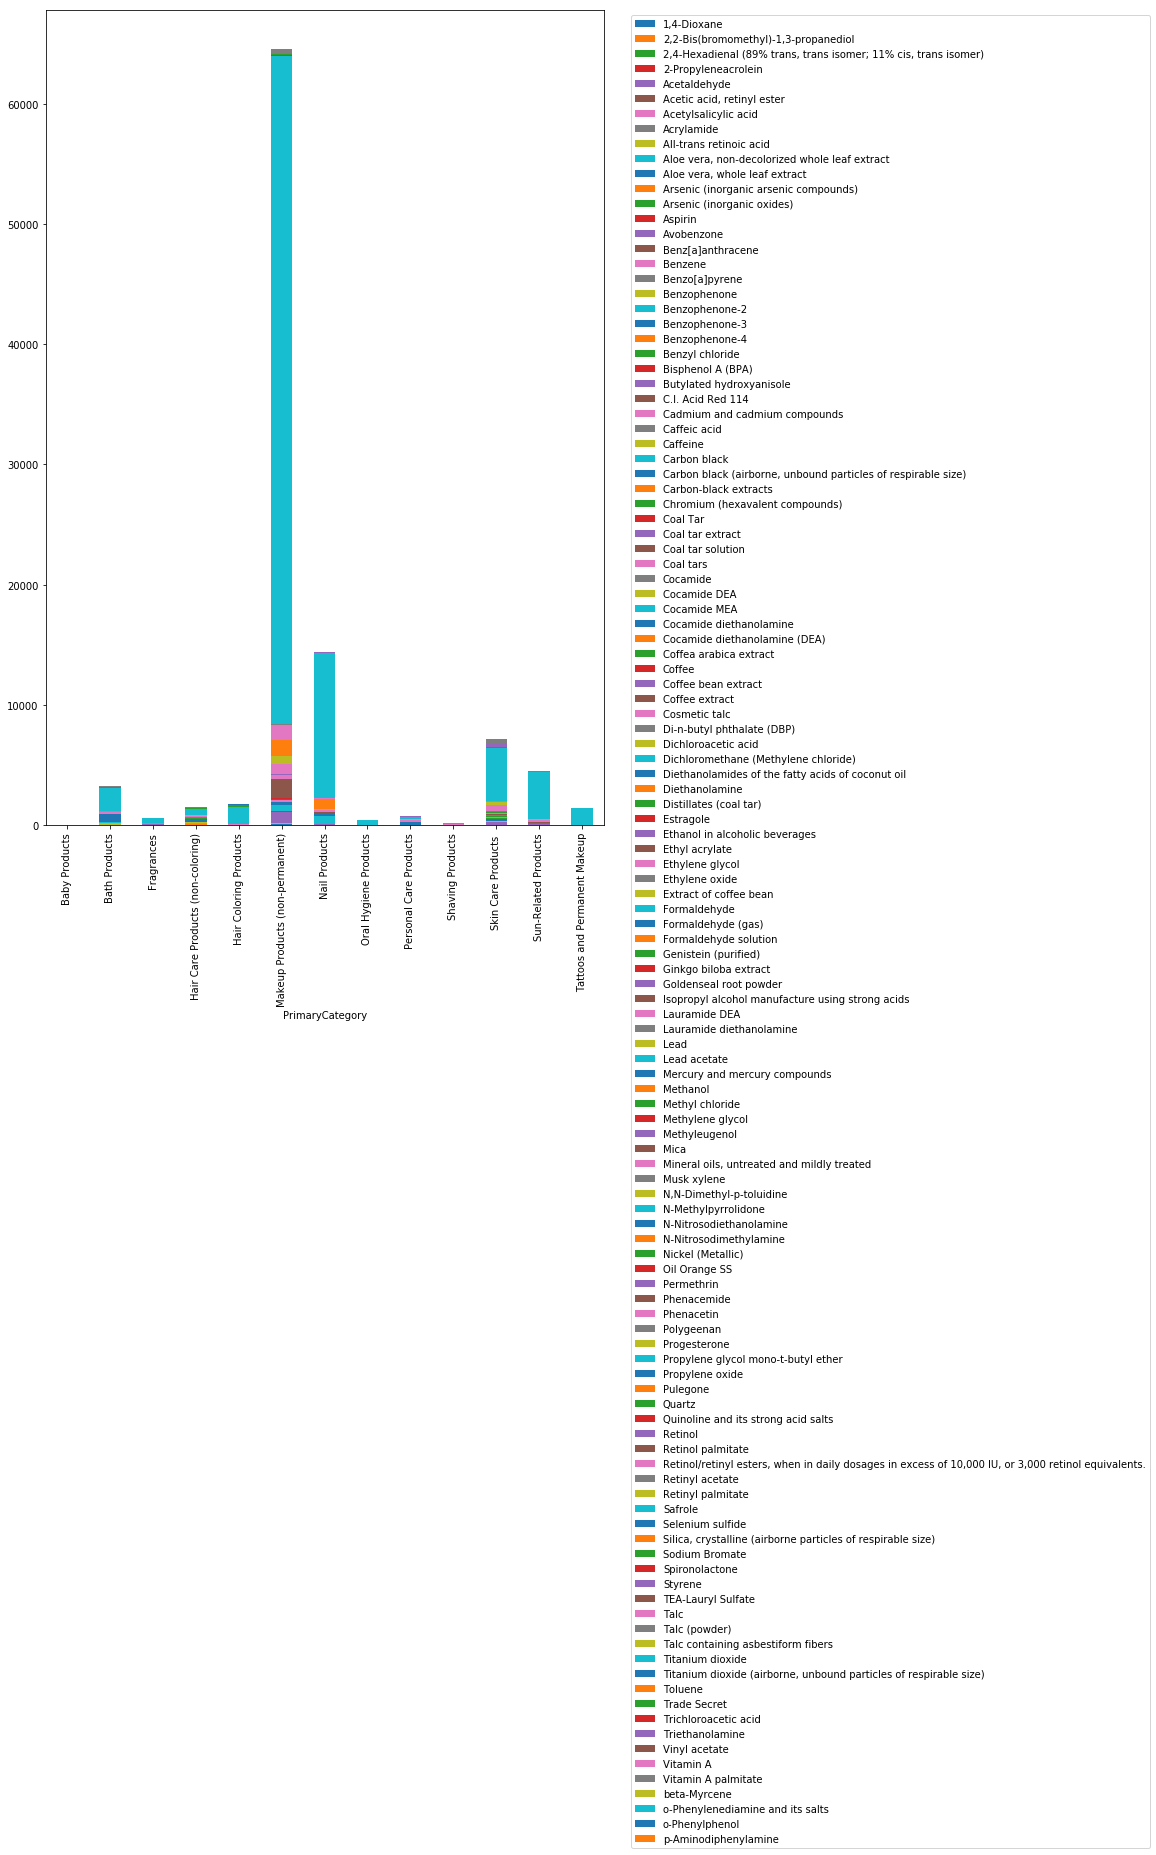

In [73]:
pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

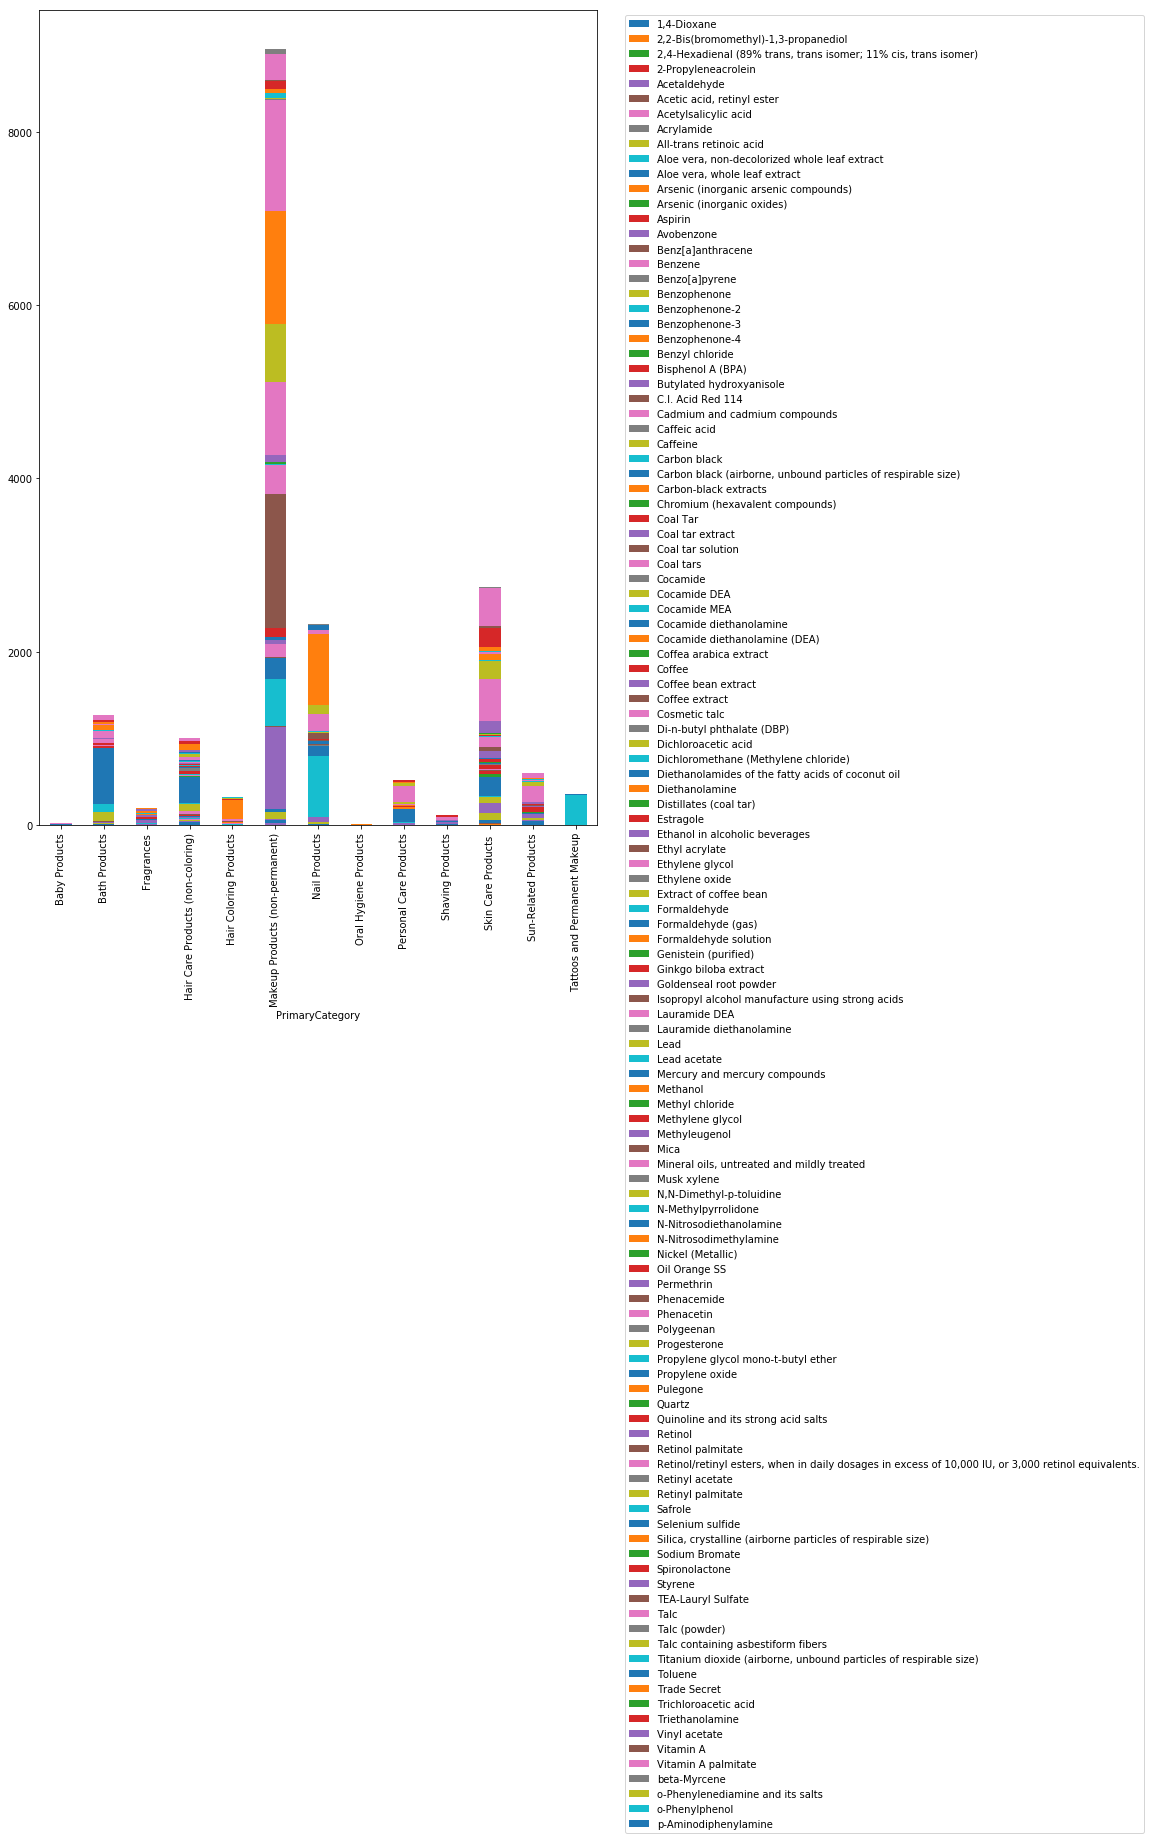

In [74]:
#plot w/o titanium
pivot_df.loc[:,pivot_df.columns !='Titanium dioxide'].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

/Users/suchaya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


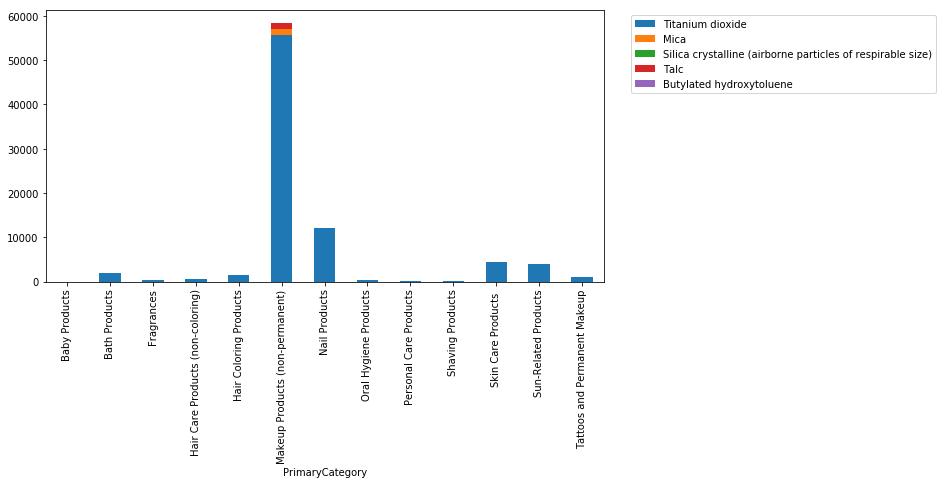

In [75]:
#Try splitting into first highest 5 chems and other chems
pivot_df.loc[:,['Titanium dioxide', 'Mica','Silica crystalline (airborne particles of respirable size)','Talc','Butylated hydroxytoluene']].plot.bar(stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**from above graph, make up products made up most of the data set. Let's take a deeper look at it**
- make up subcategory
- Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils, Face Powders, Foundations and Bases, Lip Balm (making a cosmetic claim), Lip Color - Lipsticks, Liners, and Pencils, Lip Gloss/Shine, Makup Fixatives, Makeup Preparations, Mascara/Eyelash Products, Paints (e.g. facial, body), Rouges, Other Makeup Productexamine MAKE UP PRODUCT (non-permanent) category**
- chemical most used

In [103]:
makeup_sub = ['Blushes', 'Eye Shadow', 'Eyeliner/Eyebrow Pencils', 'Face Powders', 'Foundations and Bases', 'Lip Balm (making a cosmetic claim)', 'Lip Color - Lipsticks, Liners, and Pencils', 'Lip Gloss/Shine', 'Makup Fixatives', 'Makeup Preparations', 'Mascara/Eyelash Products', 'Paints (e.g. facial, body)', 'Rouges', 'Other Makeup Product']

In [104]:
len(makeup_sub) #14 sub categories in make up

14

In [105]:
makeupsub = cgroup[cgroup.PrimaryCategory == 'Makeup Products (non-permanent)']

Text(0, 0.5, 'SubCategory')

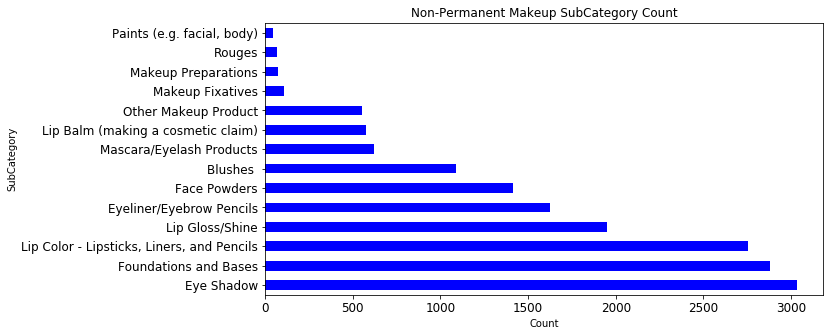

In [107]:
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['SubCategory'].value_counts().plot(kind='barh', color='b', fontsize =12, title = 'Non-Permanent Makeup SubCategory Count')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

Text(0, 0.5, 'SubCategory')

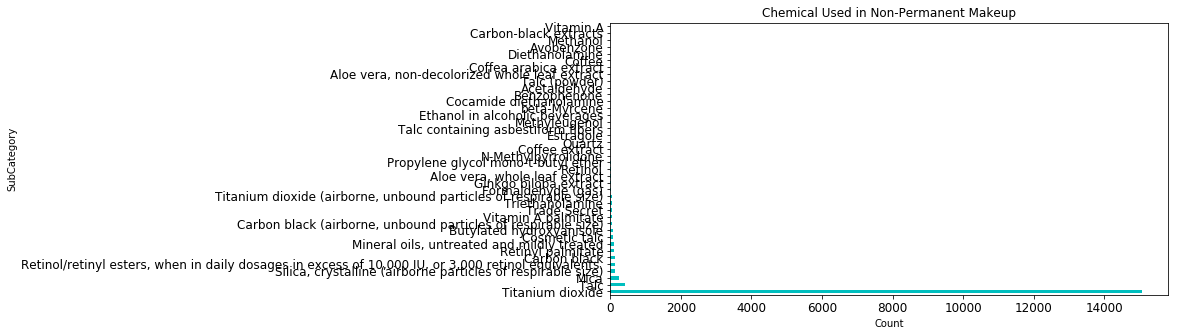

In [109]:
#most used chemical in non-permanent make up
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['ChemicalName'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Chemical Used in Non-Permanent Makeup')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

In [ ]:
#plot chemical used in make up category

**CompanyName**

In [92]:
#total of 584 companies reported
#total of 34908 reported products
comp = cgroup.CompanyName.value_counts()*100/34908
comp = comp.to_frame().reset_index()
comp = comp.rename(columns = {'CompanyName':'Percentage'})
comp

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
579,dlclaboratoriesinc,0.002865
580,woosincosmeticscoltd,0.002865
581,herbalharvestinc,0.002865
582,rexall-sundown,0.002865


Text(0, 0.5, 'Count')

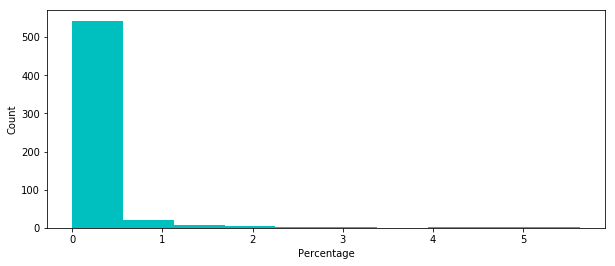

In [93]:
plt.subplots(figsize=(10,4))
plt.hist(comp.Percentage, color='c')
plt.xlabel('Percentage')
plt.ylabel('Count')

In [94]:
#NEED CRITERIA to determine interesting/meaningful company data to look further into
comp[comp.Percentage >= 1]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
5,buth-na-bodhaigeinc,2.962072
6,theprocter&gamblecompany,2.394867
7,anastasiabeverlyhillsllc,2.360490
8,hand&nailharmonyinc,2.165693
9,victoria'ssecretbeauty,2.128452


In [101]:
comp[comp.Percentage > comp.Percentage.mean()].count()

index         106
Percentage    106
dtype: int64

In [100]:
#comp[comp.Percentage > comp.Percentage.median()]

In [99]:
comp[comp.Percentage > comp.Percentage.quantile(0.90)].count()

index         59
Percentage    59
dtype: int64

In [102]:
#observing the company with highest percentage reported product 
brand_a = cgroup[cgroup['CompanyName'] == 'americaninternationalindustries']
brand_a.groupby(['BrandName']).count().sort_values(by=['ProductName'], ascending=False)

,CDPHId,ProductName,CSF,CompanyName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
BrandName,,,,,,,,,,,,,,,
China Glaze,441,441,0,441,441,441,441,441,441,441,441,0,441,441,2
IBD,406,406,0,406,406,406,406,406,406,406,406,0,406,406,1
EzFlow,253,253,0,253,253,253,253,253,253,253,253,0,253,253,0
Salon Perfect,98,98,0,98,98,98,98,98,98,98,98,0,98,98,0
Seche,88,88,0,88,88,88,88,88,88,88,88,0,88,88,0
SuperNail,79,79,0,79,79,79,79,79,79,79,79,0,79,79,0
Super Nail,42,42,0,42,42,42,42,42,42,42,42,0,42,42,0
Body Drench,41,41,0,41,41,41,41,41,41,41,41,0,41,41,0
Gelaze,40,40,0,40,40,40,40,40,40,40,40,0,40,40,0


**DATE COLUMNS**

In [112]:
cdata['MostRecentDateReported'].sort_values()

1        2009-07-01
2        2009-07-01
36       2009-08-11
37       2009-08-11
46       2009-08-18
            ...    
107480   2019-12-16
107481   2019-12-16
107482   2019-12-16
107471   2019-12-16
107511   2019-12-16
Name: MostRecentDateReported, Length: 100633, dtype: datetime64[ns]

In [113]:
cdata['InitialDateReported'].sort_values()

0        2009-06-17
1        2009-07-01
2        2009-07-01
3        2009-07-09
4        2009-07-09
            ...    
107481   2019-12-16
107482   2019-12-16
107483   2019-12-16
107472   2019-12-16
107511   2019-12-16
Name: InitialDateReported, Length: 100633, dtype: datetime64[ns]

//findings//
- earliest initialdatereported is 2009-06-17, latest is  2019-12-16
- earliest mostrecentdatereported is 2009-07-01, latest is 2019-12-16

In [116]:
inidate = cgroup.InitialDateReported.value_counts()
inidate = inidate.to_frame().reset_index()
inidate = inidate.rename(columns = {'InitialDateReported':'Count'})

In [117]:
mrdate = cgroup.MostRecentDateReported.value_counts()
mrdate = mrdate.to_frame().reset_index()
mrdate = mrdate.rename(columns = {'MostRecentDateReported':'Count'})

In [119]:
disdate = cgroup.DiscontinuedDate.value_counts()
disdate = disdate.to_frame().reset_index()
disdate = disdate.rename(columns = {'DiscontinuedDate':'Count'})

In [120]:
rmdate = cgroup.ChemicalDateRemoved.value_counts()
rmdate = rmdate.to_frame().reset_index()
rmdate = rmdate.rename(columns = {'ChemicalDateRemoved':'Count'})

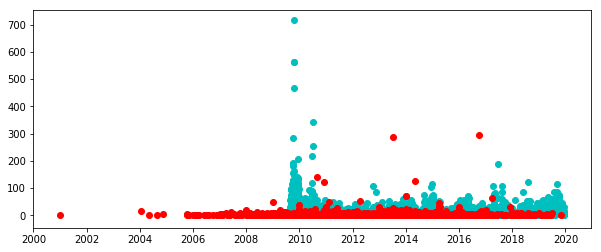

In [121]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(inidate['index'],inidate['Count'], color='c')
ax.scatter(disdate['index'],disdate['Count'], color='red')
#ax.plot(inidate['index'], inidate['Count'], color='c')
#ax.plot(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

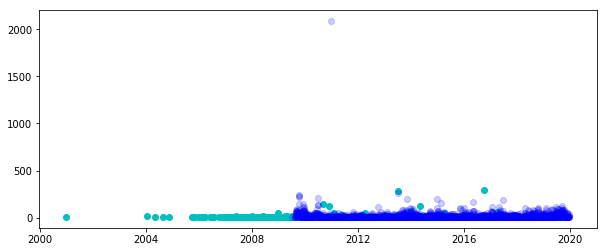

In [122]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(disdate['index'], disdate['Count'], color='c')
ax.scatter(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

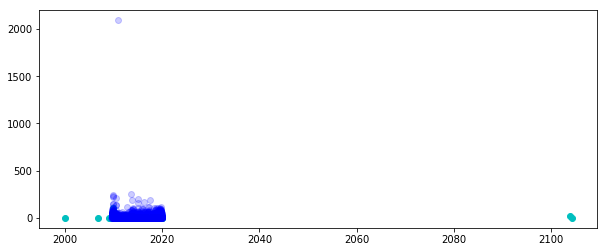

In [125]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(rmdate['index'], rmdate['Count'], color='c')
ax.scatter(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)